<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 2</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import methods.HD_AAO_Estim_Improv_Methods as aao


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

In [47]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['savefig.dpi'] = 600

#### Group Features Definition

In [4]:
## Grouping of different features provided by Enroll-HD

patient_features =  ['caghigh', 'caglow', 'parenthd_impFill', 'region_impFill', 'parentagesx_impFill', 'sex', 'race',
                     'handed_impFill', 'weight_filled_impFill', 'height_filled_impFill']

others = ['rtrddur_filled_impFill', 'age', 'cap_score', 'bmi_new_impFill', 'packy_impFill', 'hxpacky_impFill',
          'cUHDRS', 'alcab_filled_impFill', 'tobyos_impFill', 'tobcpd_impFill', 'patient_alive_impFill']

under_eval = ['tobab_filled_impFill']

lifestyle_features = ['isced_filled_impFill', 'maristat_filled_impFill', 'res_filled_impFill', 'jobclas_filled_impFill',
                      'emplnrsn_filled_impFill', 'nmdrg_filled_impFill', 'nmdrgfrq_filled_impFill', 'cafab_filled_impFill',
                      'cafpd_filled_impFill', 'hxalcab_filled_impFill', 'alcunits_filled_impFill', 'hxtobab_filled_impFill',
                      'hxtobcpd_impFill', 'hxtobyos_impFill']

assessm_features = ['pbashalsm_1', 'pbashalsm_2', 'pbashalsm_3', 'pbashalsm_4', 'pbashalsm_5', 'pbasaptsv_impFill',
'pbasdelfr_impFill', 'pbashalsv_impFill', 'pbashalfr_impFill', 'swrt_impFill', 'sbh7_impFill', 'scnt_impFill',
'pbasaptfr_impFill', 'ccvab_impFill', 'pbasirrsv_impFill', 'ccdep_impFill', 'ccpsy_impFill', 'cccog_impFill', 
'sit_impFill', 'carelevl_impFill', 'ccapt_impFill', 'sdmt_impFill', 'finances_impFill', 'pbasaggfr_impFill',
'pbasocsv_impFill', 'ccpob_impFill', 'occupatn_impFill', 'ccirb_impFill', 'adl_impFill', 'pbaspersv_impFill',
'pbasirrfr_impFill', 'pbasocfr_impFill', 'pbasperfr_impFill', 'emplusl_impFill', 'verflt_impFill', 'pbassidsv_impFill', 
'pbasdepfr_impFill', 'pbasaggsv_impFill', 'pbasdelsv_impFill', 'emplany_impFill', 'verfct_impFill', 'chores_impFill', 
'pbasdepsv_impFill', 'pbasanxfr_impFill', 'pbasanxsv_impFill', 'drive_impFill', 'fafinan_impFill', 'bed_impFill',
'pbassidfr_impFill', 'toilet_impFill', 'pbasdisbsv_impFill', 'bathe_impFill', 'sbh_filled_impFill', 
'housewrk_impFill', 'trnchair_impFill', 'supchild_impFill', 'volunt_impFill', 'laundry_impFill', 'grocery_impFill',
'dress_impFill', 'pbasdisbfr_impFill', 'pubtrans_impFill', 'walknbr_impFill', 'cash_impFill', 'prepmeal_impFill',
'comb_impFill', 'telephon_impFill', 'ownmeds_impFill', 'feedself_impFill', 'walkhelp_impFill', 'int1_filled_impFill',
'chorrle_impFill', 'sacvelh_impFill', 'chorlle_impFill', 'carehome_impFill', 'chorrue_impFill', 'chorlue_impFill', 
'dystlle_impFill', 'dystrle_impFill', 'sacvelv_impFill', 'hxsid_impFill', 'rdcwk_filled_impFill', 'sacinitv_impFill', 
'sacinith_impFill', 'walkfall_impFill', 'dystlue_impFill', 'prosupr_impFill', 'dystrue_impFill', 'ocularh_impFill',
'ocularv_impFill', 'prosupl_impFill', 'fingtapl_impFill', 'fingtapr_impFill', 'gait_impFill', 'rigarml_impFill', 
'dysarth_impFill', 'rigarmr_impFill', 'gen1_impFill', 'chorbol_impFill', 'brady_impFill', 'dysttrnk_impFill', 
'chorface_impFill', 'tandem_impFill', 'tongue_impFill', 'chortrnk_impFill', 'retropls_impFill', 'pbainfo_impFill',
'verfct5_impFill', 'indepscl_impFill', 'scnt1_impFill', 'sdmt1_impFill', 'luria_impFill', 'swrt1_impFill', 'sit1_impFill',
'sxmajor_sym_impFill', 'verflt05_impFill', 'verfct6_impFill', 'verflt07_impFill', 'verflt06_impFill', 'sit2_impFill',
'scnt3_impFill', 'sit3_impFill', 'sdmt2_impFill', 'scnt2_impFill', 'swrt3_impFill', 'swrt2_impFill', 'verfct7_impFill',
'ccmtr_impFill']

score_features = ['motscore_impFill', 'tfcscore_impFill', 'fascore_impFill', 'depscore_new_impFill', 
'irascore_new_impFill', 'psyscore_new_impFill', 'aptscore_new_impFill', 'exfscore_new_impFill']

onset_features = ['ccmtrage', 'sxsubj', 'sxfam', 'hddiagn', 'sxrater', 'sxgs', 'sxgsdy', 'ccdepage', 'ccirbage', 'ccvabage', 
'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']

study_features = ['patient_num', 'subjid', 'studyid', 'year_seq', 'visdy', 'hdcat_0', 'hdcat_l', 'hdcat_impFill', 
'evtnum_filled', 'diagconf_impFill']

reduced_features = ['age', 'caghigh', 'parentagesx_impFill', 'nmdrgfrq_filled_impFill', 'maristat_filled_impFill',
                    'emplnrsn_filled_impFill', 'alcunits_filled_impFill']

In [5]:
## Variable categorization of different features provided by Enroll-HD

bool_cols = ["alcab_filled", "bathe", "bed", "cafab_filled", "cafpd_filled", "carehome", "cash", "ccapt", "cccog", "ccdep", "ccirb",
                 "ccmtr", "ccpob", "ccpsy", "ccvab", "comb", "dress", "drive", "emplany", "emplusl", "fafinan", "feedself", "gen1",
                 "grocery", "housewrk", "hxalcab_filled", "hxsid", "hxtobab_filled", "laundry", "nmdrg_filled", "ownmeds", "parenthd",
                 "patient_alive", "pbashalsm_1", "pbashalsm_2", "pbashalsm_3", "pbashalsm_4", "pbashalsm_5", "prepmeal", "pubtrans",
                 "rdcwk_filled", "sbh_filled", "sbh7", "scnt", "sdmt", "sit", "supchild", "swrt", "telephon", "tobab_filled", "toilet",
                 "trl", "trnchair", "verfct", "verflt", "volunt", "walkfall", "walkhelp", "walknbr"]  # 59 Boolean columns

catg_cols = ["handed", "res_filled", "jobclas_filled", "maristat_filled", "race", "pbainfo", "emplnrsn_filled", "sxmajor_sym",
                 "hdcat", "hdcat_0", "hdcat_l", "region", "sex", "studyid"]  # 14 Categorical columns

ordn_cols = ["adl", "brady", "carelevl", "chorbol", "chores", "chorface", "chorlle", "chorlue", "chorrle", "chorrue",
                 "chortrnk", "diagconf", "dysarth", "dystlle", "dystlue", "dystrle", "dystrue", "dysttrnk", "finances", "fingtapl",
                 "fingtapr", "gait", "indepscl", "int1_filled", "isced_filled", "luria", "nmdrgfrq_filled", "occupatn", "ocularh", "ocularv", "pbasaggfr",
                 "pbasaggsv", "pbasanxfr", "pbasanxsv", "pbasaptfr", "pbasaptsv", "pbasdelfr", "pbasdelsv", "pbasdepfr", "pbasdepsv",
                 "pbasdisbfr", "pbasdisbsv", "pbashalfr", "pbashalsv", "pbasirrfr", "pbasirrsv", "pbasocfr", "pbasocsv", "pbasperfr",
                 "pbaspersv", "pbassidfr", "pbassidsv", "prosupl", "prosupr", "retropls", "rigarml", "rigarmr", "sacinith", "sacinitv",
                 "sacvelh", "sacvelv", "year_seq", "tandem", "tongue"]  # 64 Categorical Ordinal columns // 'seq' is changed to the new version: 'year_seq'

numr_cols = ["age", "alcunits_filled", "aptscore_new", "bmi_new", "caghigh", "caglow",  "ccaptage", "cccogage", "ccdepage",
                 "ccirbage", "ccmtrage", "ccpobage", "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore",
                 "fiscore", "height_filled", "hxpacky", "hxtobcpd", "hxtobyos", "irascore_new", "miscore", "motscore", "packy",
                 "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3",
                 "verfct5", "verfct6", "verfct7", "verflt05", "verflt06", "verflt07", "visdy", "weight_filled"]  # 58 Numeric columns

intg_cols = ["age", "aptscore_new", "caghigh", "caglow", "ccaptage", "cccogage", "ccdepage", "ccirbage", "ccmtrage", "ccpobage",
                 "ccpsyage", "ccvabage", "depscore_new", "evtnum_filled", "exfscore_new", "fascore", "fiscore", "hxtobcpd", "hxtobyos", "irascore_new",
                 "miscore", "motscore", "parentagesx", "psyscore_new", "rtrddur_filled", "scnt1", "scnt2", "scnt3", "sdmt1", "sdmt2", "sit1", "sit2", "sit3",
                 "swrt1", "swrt2", "swrt3", "tfcscore", "tobcpd", "tobyos", "trla1", "trla2", "trla3", "trlb1", "trlb2", "trlb3", "verfct5", "verfct6",
                 "verfct7", "verflt05", "verflt06", "verflt07", "visdy"]  # 52 integer columns --> subset of numeric columns



#### Loading Dataset

In [6]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group
# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### Feature Analysis - Target HDDiagn

In [7]:
## Patients considered genetic carrier

feat_model_df = hd_imputed_df[(hd_imputed_df['caghigh'] >= 35)]

In [8]:
## Only manifested patients that were enrolled as pre-manifested

feat_model_df = feat_model_df[(feat_model_df['hdcat_l'] == 3.0) & 
                              (feat_model_df['hdcat_0'] == 2.0) &
                              (feat_model_df['hdcat_impFill'] == 3.0)]

feat_model_df['hddiagn'].fillna(feat_model_df['ccmtrage'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxrater'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxfam'], inplace=True)
feat_model_df['hddiagn'].fillna(feat_model_df['sxsubj'], inplace=True)

In [9]:
## Create Study Dataset (from PostProcessed training Stage1 file)
## Target: hddiagn

target_pp = ['hddiagn']
columns_pp = patient_features + lifestyle_features

feat_model_df = feat_model_df.groupby('subjid').first()[target_pp + columns_pp]
feat_model_df = feat_model_df.reset_index()
feat_model_df.dropna(subset = ['hddiagn'], inplace=True)
feat_model_df

,subjid,hddiagn,caghigh,caglow,parenthd_impFill,region_impFill,parentagesx_impFill,sex,race,handed_impFill,weight_filled_impFill,height_filled_impFill,isced_filled_impFill,maristat_filled_impFill,res_filled_impFill,jobclas_filled_impFill,emplnrsn_filled_impFill,nmdrg_filled_impFill,nmdrgfrq_filled_impFill,cafab_filled_impFill,cafpd_filled_impFill,hxalcab_filled_impFill,alcunits_filled_impFill,hxtobab_filled_impFill,hxtobcpd_impFill,hxtobyos_impFill
0,1347826,68.0,41,15,1.0,3,59.0,1,0.0,0.0,68.0,167.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2593663,53.0,42,20,1.0,3,60.0,0,0.0,0.0,80.0,178.0,4.0,2.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5033118,57.0,43,23,1.0,3,43.0,0,0.0,0.0,73.0,183.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,0.0
3,5796487,49.0,42,18,1.0,3,65.0,0,0.0,0.0,68.0,170.0,1.0,3.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,18.0,20.0
4,5895058,45.0,45,25,1.0,1,50.0,0,0.0,0.0,79.4,170.0,5.0,3.0,3.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,988755452,43.0,41,19,1.0,3,54.0,0,0.0,0.0,75.0,180.0,3.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
885,995587389,39.0,48,18,1.0,1,32.0,0,0.0,0.0,69.9,177.8,3.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,21.0
886,996268693,43.0,46,22,1.0,3,55.0,0,0.0,0.0,71.1,180.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,25.0,1.0,12.0,16.0
887,996629325,53.0,42,17,1.0,3,60.0,0,0.0,0.0,75.5,182.0,5.0,2.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,16.0,0.0,0.0,0.0


In [10]:
## Execute Feature Selection using 3 different Models (SelectKBest, Mutual Information and Lasso)

fs_results_sk, fs_results_mi, fs_results_ls = aao.select_features(feat_model_df, target_pp, columns_pp)

## Percentage Calculation and Agregation of results

fs_results_sk['Select KBest'] = (fs_results_sk['score']*100/fs_results_sk['score'].sum())
fs_results_mi['Mutual Information'] = (fs_results_mi['score']*100/fs_results_mi['score'].sum())
fs_results_ls['Lasso'] = (fs_results_ls['score']*100/fs_results_ls['score'].sum())

fs_results_sk['Cumulative Select KBest'] = fs_results_sk['Select KBest'].cumsum()
fs_results_mi['Cumulative Mutual Information'] = fs_results_mi['Mutual Information'].cumsum()
fs_results_ls['Cumulative Lasso'] = fs_results_ls['Lasso'].cumsum()

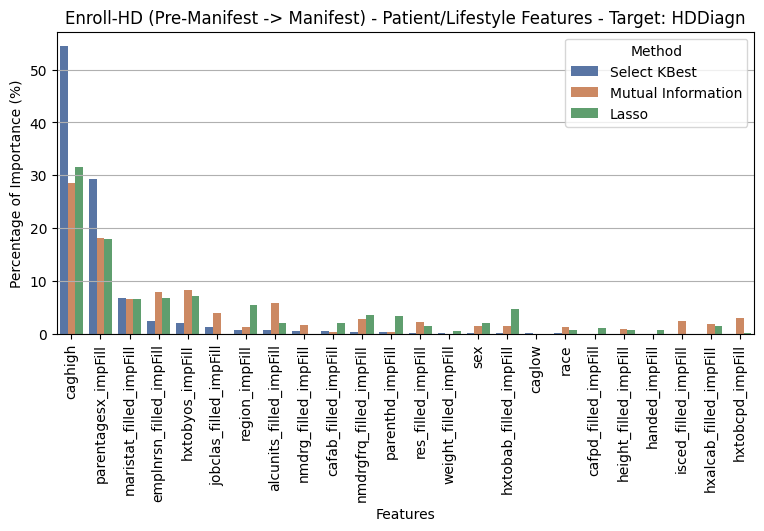

In [35]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)
                   
fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.barplot(data=res3, x="feature", y="value", hue='Method', palette="deep")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - Patient/Lifestyle Features - Target: HDDiagn')
plt.grid(axis='y')
plt.show()

In [12]:
res3

,feature,Method,value
0,caghigh,Select KBest,54.465329
1,parentagesx_impFill,Select KBest,29.393245
2,maristat_filled_impFill,Select KBest,6.728591
3,emplnrsn_filled_impFill,Select KBest,2.413725
4,hxtobyos_impFill,Select KBest,1.971349
5,jobclas_filled_impFill,Select KBest,1.243638
6,region_impFill,Select KBest,0.684635
7,alcunits_filled_impFill,Select KBest,0.668013
8,nmdrg_filled_impFill,Select KBest,0.508588
9,cafab_filled_impFill,Select KBest,0.443928


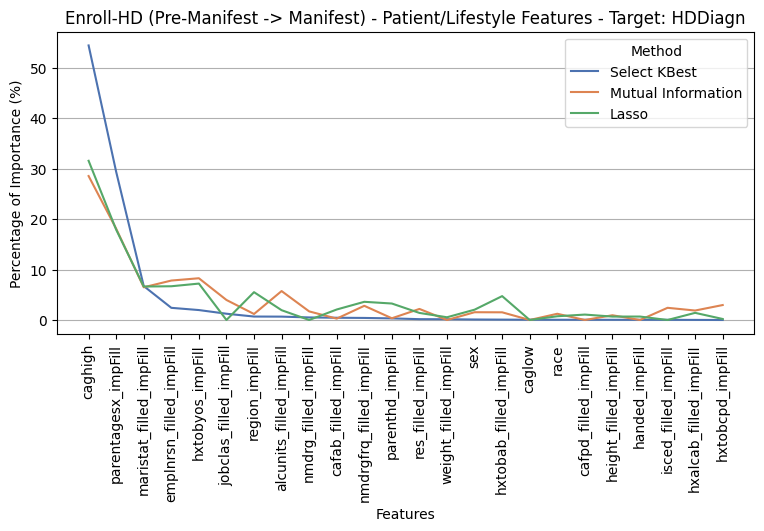

In [36]:
## Graph showing the feature selection results

res1 = pd.merge(fs_results_sk, fs_results_mi, on=['feature'])
res2 = pd.merge(res1, fs_results_ls, on=['feature'])
res2 = res2.drop(columns=['target_x', 'score_x', 'target_y', 'score_y', 'target', 'score'])
res3 = pd.melt(res2[['feature','Select KBest', 'Mutual Information', 'Lasso']], id_vars = "feature")
res3.rename(columns={"variable": "Method"}, inplace=True)

fig, axs = plt.subplots(1, 1, figsize=(9,4))
sns.lineplot(data=res3, x="feature", y="value", hue='Method', palette="deep")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Importance (%)')
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - Patient/Lifestyle Features - Target: HDDiagn')
plt.grid(axis='y')
plt.show()

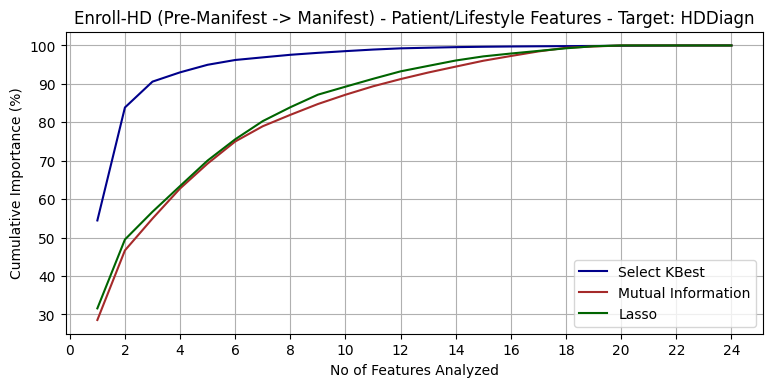

In [37]:
## Graph showing the feature selection results

runs = range(1, len(fs_results_sk)+1)

plt.figure(figsize = (9,4))
plt.plot(runs, fs_results_sk['Cumulative Select KBest'], color='darkblue', label='Select KBest')  
plt.plot(runs, fs_results_mi['Cumulative Mutual Information'], color='brown', label='Mutual Information')  
plt.plot(runs, fs_results_ls['Cumulative Lasso'], color='darkgreen', label='Lasso')  

plt.ylabel('Cumulative Importance (%)')
plt.xlabel('No of Features Analyzed')
plt.xticks(range(0,len(fs_results_sk)+1,2))
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - Patient/Lifestyle Features - Target: HDDiagn')
plt.grid()
plt.legend()
plt.show()

#### Models Analysis - Target HDDiagn

In [15]:
## Try All Models (using fixed seed)
# Only Penetrant range of the disease was used.

# Parameters
cag_min = 40
cag_max = 61
target = 'hddiagn'
NNparams = [100, 10, 2]
# NNparams = [70, 12]
runOneHotEnc = 1

# Identify Categorical Features
num_columns_pp = []
cat_columns_pp = []

for i in fs_results_sk['feature'].values:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)      
        
cols = [num_columns_pp, cat_columns_pp]

# Execute the Evaluation
summary_all_feat = aao.train_models_all(feat_model_df, cag_min, cag_max, cols, target, NNparams, runOneHotEnc)

# Print Results
summary_all_feat

(845, 26)
a=16.890
b=0.118
c=8.433
----------------------------------------
Langbehn original
Dropped 0 samples
845 samples left

----------------------------------------
Langbehn refitted
Dropped 0 samples
845 samples left

----------------------------------------
FeedForwardNN
Dropped 0 samples
845 samples left
6/6 [==============================] - 0s 1ms/step

----------------------------------------
Random Forest
Dropped 0 samples
845 samples left

----------------------------------------
CatBoost
Dropped 0 samples
845 samples left

----------------------------------------
XGBoost
Dropped 0 samples
845 samples left

----------------------------------------
MLP
Dropped 0 samples
845 samples left

----------------------------------------
Linear SVM
Dropped 0 samples
845 samples left

----------------------------------------
KNN
Dropped 0 samples
845 samples left

----------------------------------------
Bagging
Dropped 0 samples
845 samples left

------------------------------------

,MAE,RMSE,R2
Model,,,
GradientBoosting,5.119382,6.570766,0.641758
Random Forest,5.261220,6.773365,0.619063
CatBoost,5.277170,6.775607,0.619441
Linear Regression,5.360605,6.829017,0.613100
ExtraTree,5.387397,6.921537,0.602067
Linear SVM,5.395971,6.840375,0.612449
FeedForwardNN,5.526504,7.074184,0.585273
XGBoost,5.566347,7.184439,0.572528
Langbehn refitted,5.617006,7.340517,0.552712


In [16]:
## Try different Models (using same random seed each run)
# Only Penetrant range of the disease was used.

# Parameters
ml_runs = 50
cag_min = 40
cag_max = 61
target = 'hddiagn'
NNparams = [100, 10, 2]

# Identify Categorical Features
num_columns_pp = []
cat_columns_pp = []

for i in fs_results_sk['feature'].values:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)      
        
cols = [num_columns_pp, cat_columns_pp]

# Execute the Evaluation
rf, gb, ab, cb, nn, rf_res, gb_res, ab_res, cb_res, nn_res  = aao.tryAllModels(feat_model_df, ml_runs, cols, target, cag_min, cag_max, NNparams)

# Print Results
print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn)
print("\nRandom Forest mean results after", ml_runs, "runs:\n", rf)
print("\nAdaBoost mean results after", ml_runs, "runs:\n", ab)
print("\nCatBoost mean results after", ml_runs, "runs:\n", cb)
print("\nGradientBoosting mean results after", ml_runs, "runs:\n", gb)


Execution no 1 using seed value 3902180063
6/6 [==============================] - 0s 977us/step
Execution no 2 using seed value 4281945197
6/6 [==============================] - 0s 1ms/step
Execution no 3 using seed value 1857019703
6/6 [==============================] - 0s 1ms/step
Execution no 4 using seed value 186185631
6/6 [==============================] - 0s 1ms/step
Execution no 5 using seed value 841083984
6/6 [==============================] - 0s 972us/step
Execution no 6 using seed value 453627142
6/6 [==============================] - 0s 1ms/step
Execution no 7 using seed value 163318133
6/6 [==============================] - 0s 1ms/step
Execution no 8 using seed value 3331280690
6/6 [==============================] - 0s 2ms/step
Execution no 9 using seed value 2471570099
6/6 [==============================] - 0s 1ms/step
Execution no 10 using seed value 3895532682
6/6 [==============================] - 0s 1ms/step
Execution no 11 using seed value 843363408
6/6 [===========

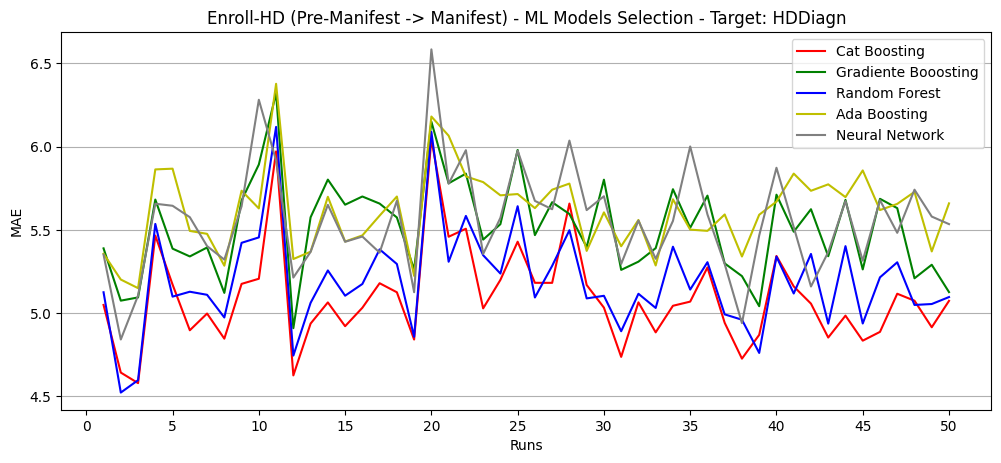

In [41]:
## MAE Graph - Models Evaluation

mae_r = []
for i in range(len(rf_res)): mae_r.append(rf_res[i][0])
mae_g = []
for i in range(len(gb_res)): mae_g.append(gb_res[i][0])
mae_n = []
for i in range(len(nn_res)): mae_n.append(nn_res[i][0])
mae_a = []
for i in range(len(ab_res)): mae_a.append(ab_res[i][0])
mae_c = []
for i in range(len(cb_res)): mae_c.append(cb_res[i][0])   
runs = range(1, len(rf_res)+1)

plt.figure(figsize = (12,5))
plt.plot(runs, mae_c, 'r', label='Cat Boosting')  
plt.plot(runs, mae_g, 'g', label='Gradiente Booosting')
plt.plot(runs, mae_r, 'b', label='Random Forest')
plt.plot(runs, mae_a, 'y', label='Ada Boosting')
plt.plot(runs, mae_n, color='gray', label='Neural Network')

plt.title('Enroll-HD (Pre-Manifest -> Manifest) - ML Models Selection - Target: HDDiagn')
plt.ylabel('MAE')
plt.xlabel('Runs')
plt.xticks(range(0,len(rf_res)+1,5))
plt.legend()
plt.grid(axis='y')
plt.show()

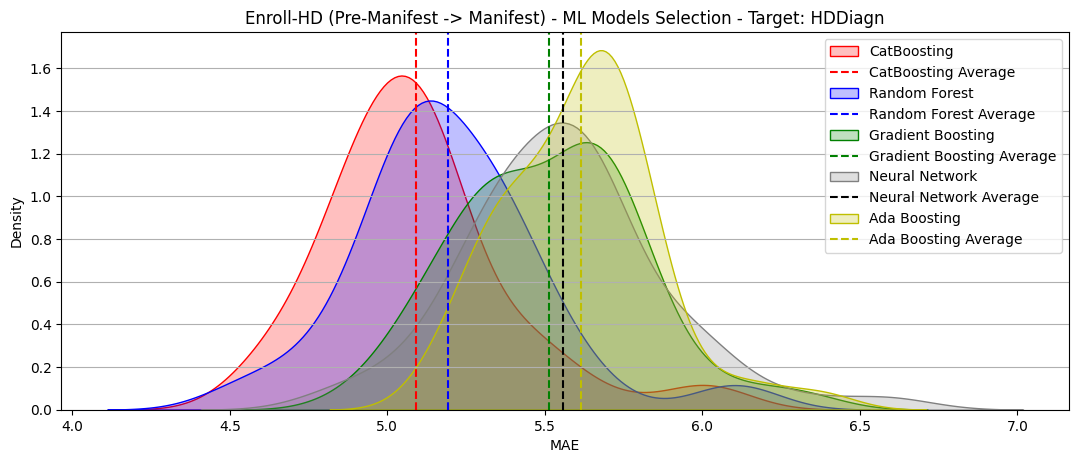

In [42]:
## MAE Graph - Models Evaluation

cb_df = pd.DataFrame(cb_res, columns=['mae', 'rmse', 'r2'])
gb_df = pd.DataFrame(gb_res, columns=['mae', 'rmse', 'r2'])
ab_df = pd.DataFrame(ab_res, columns=['mae', 'rmse', 'r2'])
rf_df = pd.DataFrame(rf_res, columns=['mae', 'rmse', 'r2'])
nn_df = pd.DataFrame(nn_res, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))

sns.kdeplot(cb_df, x="mae", color='r', ax=ax, label='CatBoosting', fill=True)
plt.axvline(np.nanmean(mae_c), 0,9, color='r', linestyle='--', label='CatBoosting Average')
sns.kdeplot(rf_df, x="mae", color='b',ax=ax, label='Random Forest', fill=True)
plt.axvline(np.nanmean(mae_r), 0,9, color='b', linestyle='--', label='Random Forest Average')
sns.kdeplot(gb_df, x="mae", color='g',ax=ax, label='Gradient Boosting', fill=True)
plt.axvline(np.nanmean(mae_g), 0,9, color='g', linestyle='--', label='Gradient Boosting Average')
sns.kdeplot(nn_df, x="mae", color='gray',ax=ax, label='Neural Network', fill=True)
plt.axvline(np.nanmean(mae_n), 0,9, color='black', linestyle='--', label='Neural Network Average')
sns.kdeplot(ab_df, x="mae", color='y',ax=ax, label='Ada Boosting', fill=True)
plt.axvline(np.nanmean(mae_a), 0,9, color='y', linestyle='--', label='Ada Boosting Average')

plt.xlabel('MAE')
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - ML Models Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


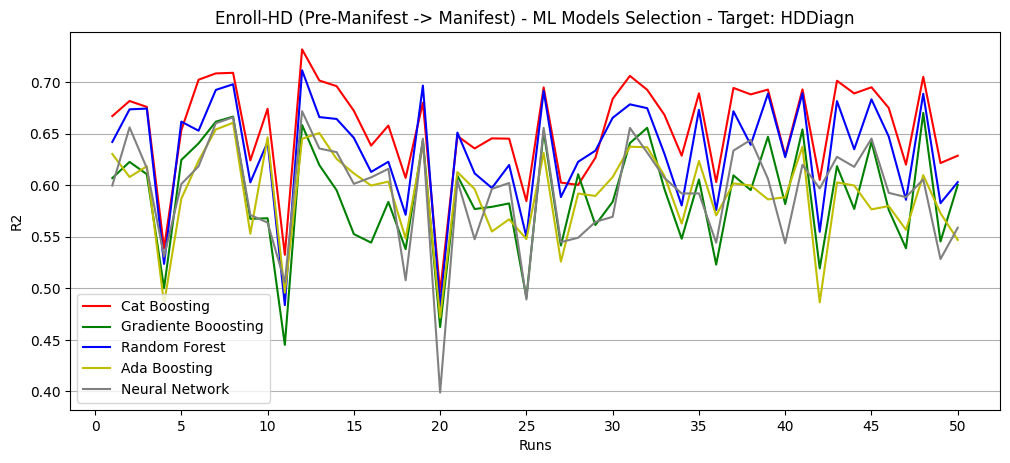

In [43]:
## R2 Graph - Models Evaluation

r2_r = []
for i in range(len(rf_res)): r2_r.append(rf_res[i][2])
r2_g = []
for i in range(len(gb_res)): r2_g.append(gb_res[i][2])
r2_n = []
for i in range(len(nn_res)): r2_n.append(nn_res[i][2])
r2_a = []
for i in range(len(ab_res)): r2_a.append(ab_res[i][2])
r2_c = []
for i in range(len(cb_res)): r2_c.append(cb_res[i][2])   
runs = range(1, len(rf_res)+1)

plt.figure(figsize = (12,5))
plt.plot(runs, r2_c, 'r', label='Cat Boosting')  
plt.plot(runs, r2_g, 'g', label='Gradiente Booosting')
plt.plot(runs, r2_r, 'b', label='Random Forest')
plt.plot(runs, r2_a, 'y', label='Ada Boosting')
plt.plot(runs, r2_n, color='gray', label='Neural Network')

plt.title('Enroll-HD (Pre-Manifest -> Manifest) - ML Models Selection - Target: HDDiagn')
plt.ylabel('R2')
plt.xlabel('Runs')
plt.xticks(range(0,len(rf_res)+1,5))
plt.grid(axis='y')
plt.legend()
plt.show()

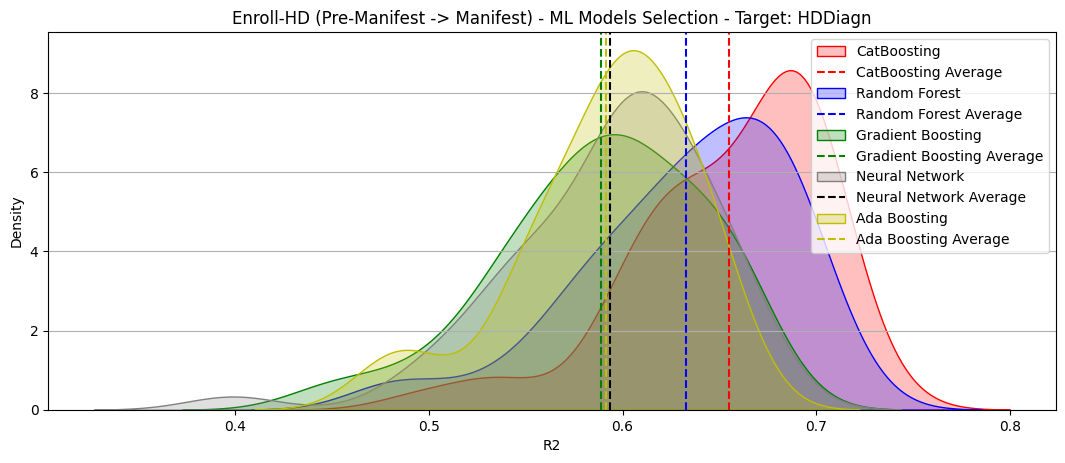

In [44]:
## R2 Graph - Models Evaluation

cb_df = pd.DataFrame(cb_res, columns=['mae', 'rmse', 'r2'])
gb_df = pd.DataFrame(gb_res, columns=['mae', 'rmse', 'r2'])
ab_df = pd.DataFrame(ab_res, columns=['mae', 'rmse', 'r2'])
rf_df = pd.DataFrame(rf_res, columns=['mae', 'rmse', 'r2'])
nn_df = pd.DataFrame(nn_res, columns=['mae', 'rmse', 'r2'])

fig, ax = plt.subplots(1, 1, figsize=(13,5))
sns.kdeplot(cb_df, x="r2", color='r', ax=ax, label='CatBoosting', fill=True)
plt.axvline(np.nanmean(r2_c), 0,9, color='r', linestyle='--', label='CatBoosting Average')
sns.kdeplot(rf_df, x="r2", color='b',ax=ax, label='Random Forest', fill=True)
plt.axvline(np.nanmean(r2_r), 0,9, color='b', linestyle='--', label='Random Forest Average')
sns.kdeplot(gb_df, x="r2", color='g',ax=ax, label='Gradient Boosting', fill=True)
plt.axvline(np.nanmean(r2_g), 0,9, color='g', linestyle='--', label='Gradient Boosting Average')
sns.kdeplot(nn_df, x="r2", color='gray',ax=ax, label='Neural Network', fill=True)
plt.axvline(np.nanmean(r2_n), 0,9, color='black', linestyle='--', label='Neural Network Average')
sns.kdeplot(ab_df, x="r2", color='y',ax=ax, label='Ada Boosting', fill=True)
plt.axvline(np.nanmean(r2_a), 0,9, color='y', linestyle='--', label='Ada Boosting Average')

plt.xlabel('R2')
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - ML Models Selection - Target: HDDiagn')
plt.legend()
plt.grid(axis='y')
plt.show()


#### Feature Impact over Models - Target HDDiagn

In [21]:
## Evaluating the adition of features one by one
# Over CatBoosting and NeuralNetwork.
# Only Penetrant range of the disease was used.

# Parameters
ml_runs = 30
scale = 1
NNparams = [100, 10, 2]
eval_cb_feat = []
eval_nn_feat = []
cag_min = 40
cag_max = 61
runOneHotEnc = 1
target = 'hddiagn'
count = 0
empty_df = pd.DataFrame()

# Identify Categorical Features and loop over each feature
num_columns_pp = []
cat_columns_pp = []

for i in fs_results_ls['feature'].values:
    if i in catg_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in catg_cols:
        cat_columns_pp.append(i)
    elif i in ordn_cols:
        cat_columns_pp.append(i)
    elif i.replace('_impFill', '') in ordn_cols:
        cat_columns_pp.append(i)        
    else:
        num_columns_pp.append(i)               

    cols = [num_columns_pp, cat_columns_pp]
    
    count = count+1
    print ("Running models to added feature:", count, i)
    
    # Execute Evaluation
    cb_fs1, nn_fs1, cb_res_fs1, nn_res_fs1, _, _, _, _, _, _ = aao.tryTwoModels(feat_model_df, ml_runs, cols, target, cag_min, cag_max, NNparams, runOneHotEnc, empty_df)

    # Print Summary
    print("\nFeedForward Neural Network mean results after", ml_runs, "runs:\n", nn_fs1)
    print("\nCatBoost mean results after", ml_runs, "runs:\n", cb_fs1)
    
    # Append Results
    eval_cb_feat.append([i, float(round(cb_res_fs1[0][0],3)), 
                         float(round(cb_res_fs1[0][1],3)), 
                         float(round(cb_res_fs1[0][2],3))])
    
    eval_nn_feat.append([i, float(round(nn_res_fs1[0][0],3)), 
                         float(round(nn_res_fs1[0][1],3)), 
                         float(round(nn_res_fs1[0][2],3))])   

Running models to added feature: 1 caghigh
Total Patients: 845
6/6 [==============================] - 0s 957us/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.719065  7.488594  0.535066

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.734676  7.471304  0.537626
Running models to added feature: 2 parentagesx_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.539909  7.207445  0.561357

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.575529  7.168945  0.566314
Running models to added feature: 3 hxtobyos_impFill
Total Patients: 845
6/6 [==============================] - 0s 968us/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.332867  6.935004  0.595852

CatBoost mean results after 30 runs:
         MAE      RMSE    

6/6 [==============================] - 0s 974us/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.046604  6.550072  0.639531

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.959254  6.378354  0.658159
Running models to added feature: 6 region_impFill
Total Patients: 845
6/6 [==============================] - 0s 958us/step

FeedForward Neural Network mean results after 30 runs:
        MAE      RMSE        R2
0  5.13454  6.595809  0.628643

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.957676  6.356872  0.654951
Running models to added feature: 7 hxtobab_filled_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.097792  6.614552  0.640918

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.945372  6.361289  0.667571
Running models to added f

6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.169225  6.607664  0.629701

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.959034  6.307851  0.662557
Running models to added feature: 10 cafab_filled_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE     RMSE        R2
0  5.211221  6.69839  0.624157

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.987752  6.399609  0.657433
Running models to added feature: 11 sex
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE     RMSE        R2
0  5.179302  6.65447  0.638174

CatBoost mean results after 30 runs:
         MAE     RMSE        R2
0  4.922722  6.35501  0.670092
Running models to added feature: 12 alcunits

6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE       R2
0  5.278221  6.820129  0.62056

CatBoost mean results after 30 runs:
        MAE      RMSE       R2
0  5.02608  6.474731  0.65789
Running models to added feature: 15 cafpd_filled_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.341797  6.862356  0.609357

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.038435  6.477238  0.651691
Running models to added feature: 16 race
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.476383  7.017559  0.608597

CatBoost mean results after 30 runs:
        MAE      RMSE        R2
0  5.08805  6.550548  0.658786
Running models to added feature: 17 handed_im

6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.389063  6.952469  0.609273

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  4.991684  6.469675  0.661633
Running models to added feature: 19 weight_filled_impFill
Total Patients: 845
6/6 [==============================] - 0s 915us/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE       R2
0  5.489222  7.051476  0.59475

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.088082  6.514093  0.654004
Running models to added feature: 20 hxtobcpd_impFill
Total Patients: 845
6/6 [==============================] - 0s 995us/step

FeedForward Neural Network mean results after 30 runs:
        MAE      RMSE        R2
0  5.49405  7.015353  0.596764

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.063823  6.477607  0.656308
Running models to added 

6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.532354  7.044561  0.586824

CatBoost mean results after 30 runs:
         MAE      RMSE        R2
0  5.022347  6.435332  0.654784
Running models to added feature: 24 nmdrg_filled_impFill
Total Patients: 845
6/6 [==============================] - 0s 1ms/step

FeedForward Neural Network mean results after 30 runs:
         MAE      RMSE        R2
0  5.641799  7.225444  0.577972

CatBoost mean results after 30 runs:
        MAE      RMSE        R2
0  5.14143  6.628614  0.645089


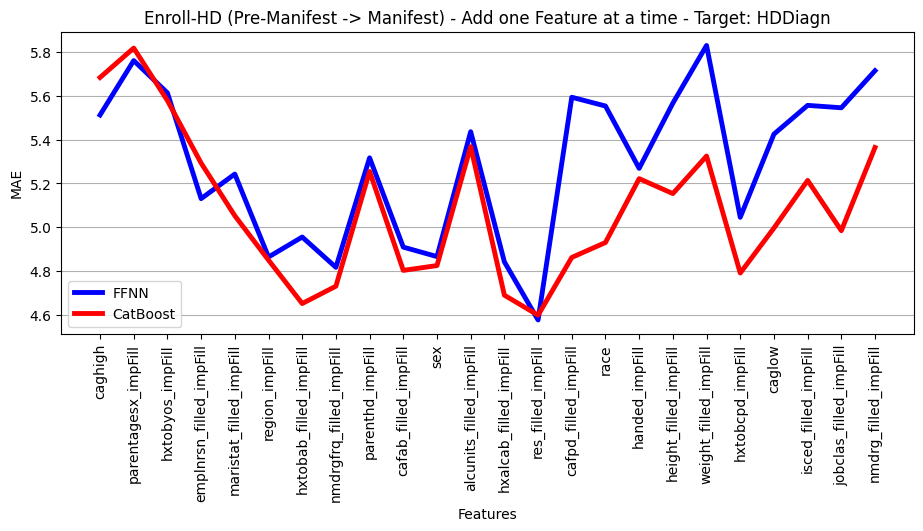

In [45]:
## MAE Graph for the Evaluating about the adition of features one by one

feat_imp_nn = pd.DataFrame(data=np.array(eval_nn_feat), columns=['feature', 'mae', 'rmse', 'r2'])
feat_imp_cb = pd.DataFrame(data=np.array(eval_cb_feat), columns=['feature', 'mae', 'rmse', 'r2'])

fig, axs = plt.subplots(1, 1, figsize=(11,4))

sns.lineplot(data=feat_imp_nn, x="feature", y=feat_imp_nn['mae'].astype(float), linewidth = 3.5, color='blue', label='FFNN')
sns.lineplot(data=feat_imp_cb, x="feature", y=feat_imp_cb['mae'].astype(float), linewidth = 3.5, color='red', label='CatBoost')

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('MAE')
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - Add one Feature at a time - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

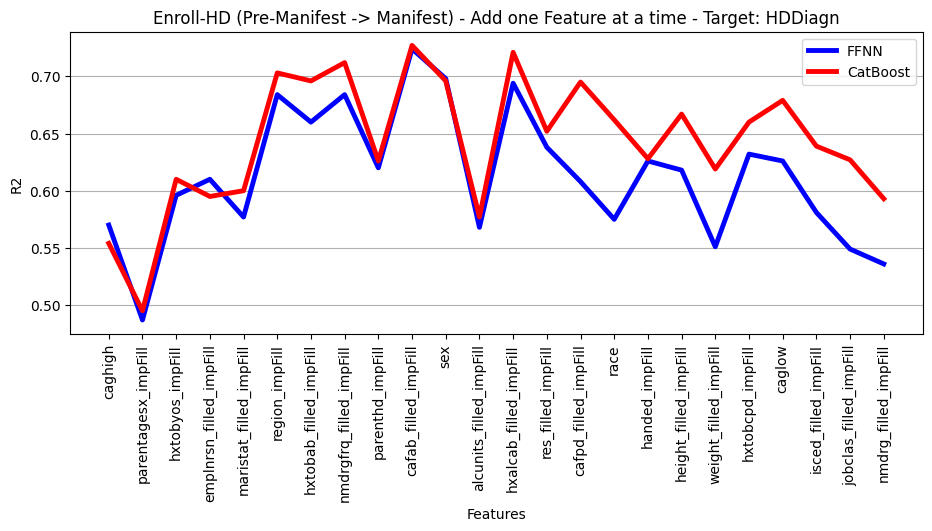

In [46]:
## R2 Graph for the Evaluating about the adition of features one by one

feat_imp_nn = pd.DataFrame(data=np.array(eval_nn_feat), columns=['feature', 'mae', 'rmse', 'r2'])
feat_imp_cb = pd.DataFrame(data=np.array(eval_cb_feat), columns=['feature', 'mae', 'rmse', 'r2'])

fig, axs = plt.subplots(1, 1, figsize=(11,4))

sns.lineplot(data=feat_imp_nn, x="feature", y=feat_imp_nn['r2'].astype(float), linewidth = 3.5, color='blue', label='FFNN')
sns.lineplot(data=feat_imp_cb, x="feature", y=feat_imp_cb['r2'].astype(float), linewidth = 3.5, color='red', label='CatBoost')

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('R2')
plt.title('Enroll-HD (Pre-Manifest -> Manifest) - Add one Feature at a time - Target: HDDiagn')
plt.grid(axis='y')
plt.legend()
plt.show()

## -----------------------------------------------------------------